In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
data = pd.read_pickle('dataset_pickle.csv')

In [18]:
df = pd.DataFrame(np.array([X for X in data.values]))

In [19]:
df

0      1    2    3                      4                      5    \
0       8.0    8.0  1.0  0.0                    0.0                    0.0   
1      32.0   39.0  1.0  0.0                    0.0                    0.0   
2       8.0    8.0  1.0  0.0                    0.0                    0.0   
3       8.0    8.0  1.0  0.0                    0.0                    0.0   
4       8.0    8.0  1.0  0.0                    0.0                    0.0   
...     ...    ...  ...  ...                    ...                    ...   
65845  31.0  159.0  1.0  0.0  0.0046616165820360985  1.763398533904127e-18   
65846  31.0  189.0  1.0  0.0  0.0046616165820360985  1.763398533904127e-18   
65847   9.0    8.0  1.0  0.0                    0.0                    0.0   
65848   8.0    8.0  1.0  0.0                    0.0                    0.0   
65849   9.0    8.0  1.0  0.0  0.0019555769334474444  8.241707485213332e-05   

       6    7    8    9    ...  112  113  114  115  116  117  118  119  120  \
0      0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
1      0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
2      0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
3      0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
4      0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
65845  0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
65846  0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
65847  0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
65848  0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
65849  0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   

      121  
0       1  
1       0  
2       1  
3       1  
4       1  
...    ..  
65845   1  
65846   0  
65847   0  
65848   1  
65849   0  

[65850 rows x 122 columns]

Перекодируем строковые данные в One-Hot 

In [50]:
categorical_data = ['N', 'Y', 'T', 'MT', 'YT', 'M']
categorical_columns = set()
for i, col in enumerate(df.columns):
    if df.iloc[:, col].isin(['N', 'Y', 'T', 'MT', 'YT', 'M']).sum() > 0:
        categorical_columns.add(i)
print("Categorical data in {}".format(categorical_columns))

Categorical data in {65, 66, 68, 69, 70, 71}


In [59]:
def generate_1H_encoding(col):
    return dict([(x, i) for i, x in enumerate(col.unique())])

In [60]:
encoders = dict([(x, generate_1H_encoding(df.iloc[:, x])) for x in categorical_columns])
encoders

{65: {'N': 0, 'Y': 1},
 66: {'T': 0, 'Y': 1, 'N': 2},
 68: {'N': 0, '-1.0': 1},
 69: {'N': 0, '-1.0': 1, 'Y': 2},
 70: {'N': 0, 'Y': 1},
 71: {'MT': 0, 'YT': 1, 'M': 2, 'Y': 3}}

In [71]:
def encode_1H(data, encoding):
    X = np.zeros((len(encoding)))
    X[encoding[data]] = 1.
    return X

def reencode(row):
    data = np.array([])
    for i in range(len(row)):
        if i in categorical_columns:
            x = encode_1H(row[i], encoders[i])
        else:
            x = row[i]
        data = np.hstack([data, x])
    return data

In [74]:
XY = np.zeros((65850, 132))

In [75]:
for i in range(65850):
    XY[i] = reencode(df.iloc[i])
df_1H = pd.DataFrame(XY)

In [2]:
# df_1H.to_pickle('dataset_1H.csv')
df = pd.read_pickle('dataset_1H.csv')

In [3]:
with pd.option_context('mode.use_inf_as_na', True):
    df.fillna(-10, inplace=True)

In [4]:
def calc_missing_data(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count() * 100).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [5]:
X = df.values[:,:-1]
y = df.values[:,-1]
X = np.clip(X, -10**10, +10*10)

In [6]:
print(X.shape, y.shape)

(65850, 131) (65850,)


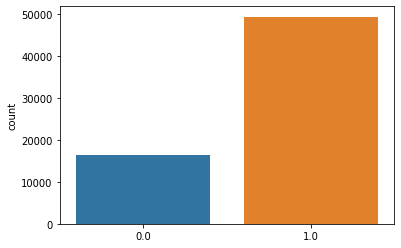

In [7]:
sns.countplot(y)

Видно, что датасет что класс 1 преобладает над 0. Это доставит проблем. Попробую сперва получить максимум на этом датасете, если не выйдет приемлемого результата, то вернусь на шаг назад и сгенерерирую датасет с большим количеством исходных признаков.

Сперва поменяю классы местами. Т. к. 0 встречается реже и мне нужны будут метрики типа Precision/Recall/$F_1 score$, то сделаю его как раз положительным классом. Датасет по итогу получился не очень большим, так что есть пространство для кучи маленьких быстрых экспериментов. Попробую множество алгоритмов и выберу лучший

In [36]:
y = 1 - y

In [9]:
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

In [50]:
def plot_confusion_matrix(y_true, y_pred, classes=[0, 1],
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,
                         verbose=1):
    from sklearn.utils.multiclass import unique_labels
    from sklearn.metrics import classification_report
    
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        if verbose == 1:
            print("Normalized confusion matrix")
    else:
        if verbose == 1:
            print('Confusion matrix, without normalization')
    f1 = f1_score(y_true, y_pred)
    if verbose == 1:
        print("F1-Score {}".format(f1))
        print(cm)
        print(classification_report(y_true, y_pred, classes))

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax, f1

In [51]:
seed = 228
X_, X_test, y_, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=0.25, random_state=seed)
print([x.shape[0] for x in [X_train, X_val, X_test]])

[39510, 13170, 13170]


In [52]:
def estimate_classifier(clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    ax, f1 = plot_confusion_matrix(y_val, y_pred)
    return f1, ax

Confusion matrix, without normalization
F1-Score 0.9481082121883123
[[2244 1039]
 [  39 9848]]
              precision    recall  f1-score   support

           0       0.98      0.68      0.81      3283
           1       0.90      1.00      0.95      9887

    accuracy                           0.92     13170
   macro avg       0.94      0.84      0.88     13170
weighted avg       0.92      0.92      0.91     13170



(0.9481082121883123, <matplotlib.axes._subplots.AxesSubplot at 0x7f4d71646320>)

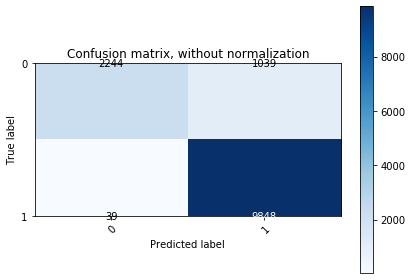

In [55]:
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=10,random_state=0)
estimate_classifier(rf_clf)

Почти наугад выбранный классификатор дает не самые плохие предсказания. Теперь попробую KNN

Confusion matrix, without normalization
F1-Score 0.4752362948960302
[[9137  750]
 [2026 1257]]


(KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                      weights='uniform'),
 0.4752362948960302,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4d6a0dae80>)

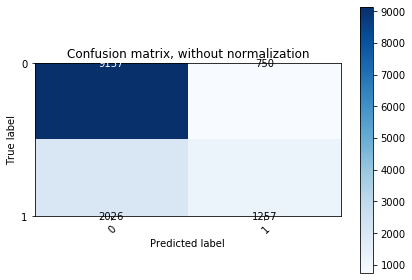

In [15]:
knn_clf = KNeighborsClassifier()
estimate_classifier(knn_clf)

Confusion matrix, without normalization
F1-Score 0.6982073553871743
[[9648  239]
 [1394 1889]]


/home/ptaxom/notebooks/TZ2/env/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


(MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
               beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
               hidden_layer_sizes=20, learning_rate='constant',
               learning_rate_init=0.001, max_iter=200, momentum=0.9,
               n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
               random_state=None, shuffle=True, solver='adam', tol=0.0001,
               validation_fraction=0.1, verbose=False, warm_start=False),
 0.6982073553871743,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4d6a021048>)

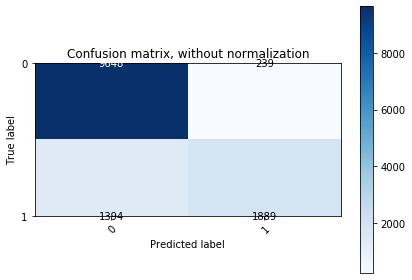

In [16]:
mlpc = MLPClassifier(hidden_layer_sizes=(20), max_iter=200, activation='logistic')
estimate_classifier(mlpc)

Confusion matrix, without normalization
F1-Score 0.841417605748816
[[9623  264]
 [ 707 2576]]


(AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                    n_estimators=50, random_state=None),
 0.841417605748816,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4d6a081c50>)

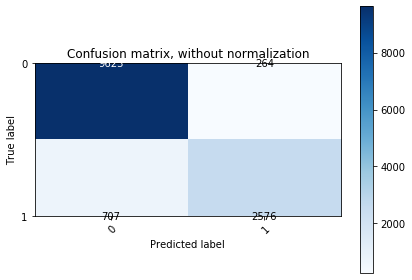

In [17]:
ada_clf = AdaBoostClassifier()
estimate_classifier(ada_clf)

Confusion matrix, without normalization
F1-Score 0.9269600883420097
[[9769  118]
 [ 345 2938]]


(XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0,
               learning_rate=0.1, max_delta_step=0, max_depth=3,
               min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
               nthread=None, objective='binary:logistic', random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
               silent=None, subsample=1, verbosity=1),
 0.9269600883420097,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4d69eb36a0>)

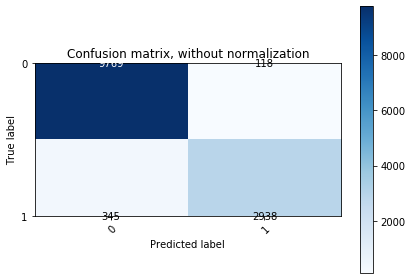

In [18]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()
estimate_classifier(xgb_clf)

Confusion matrix, without normalization
F1-Score 0.9656553211150469
[[9812   75]
 [ 148 3135]]


(DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=None, splitter='best'),
 0.9656553211150469,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4d69c12f28>)

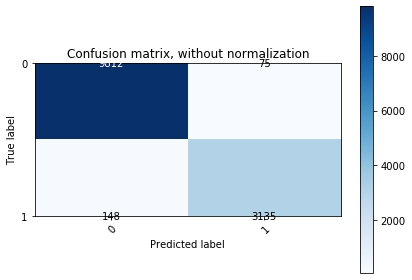

In [19]:
dct_clf = DecisionTreeClassifier(max_depth=20)
estimate_classifier(dct_clf)

Confusion matrix, without normalization
F1-Score 0.41434037126257617
[[1980 7907]
 [ 359 2924]]


(GaussianNB(priors=None, var_smoothing=1e-09),
 0.41434037126257617,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4d69abb630>)

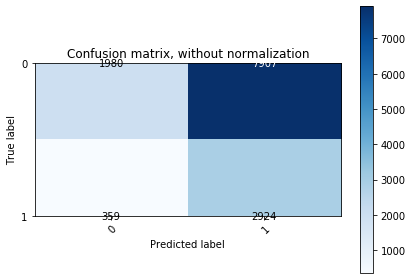

In [21]:
nb_clf = GaussianNB()
estimate_classifier(nb_clf)

In [30]:
classifiers = ((knn_clf, "K-near neighbors"),
    (mlpc, "Neural Network"),
    (dct_clf, "Decision tree"),               
    (rf_clf, "Random Forest"),
    (ada_clf, "Adaptive Boost"),
    (xgb_clf, "Gradient Boost"),
    (nb_clf, "Naive Bayes"))

In [31]:
fscores = [f1_score(y_test, clf[0].predict(X_test)) for clf in classifiers]

In [32]:
fscores

[0.4766214177978884,
 0.7006298629121896,
 0.9644732777262899,
 0.7860277980980248,
 0.8304724538172307,
 0.9245641838351824,
 0.4079412180302388]

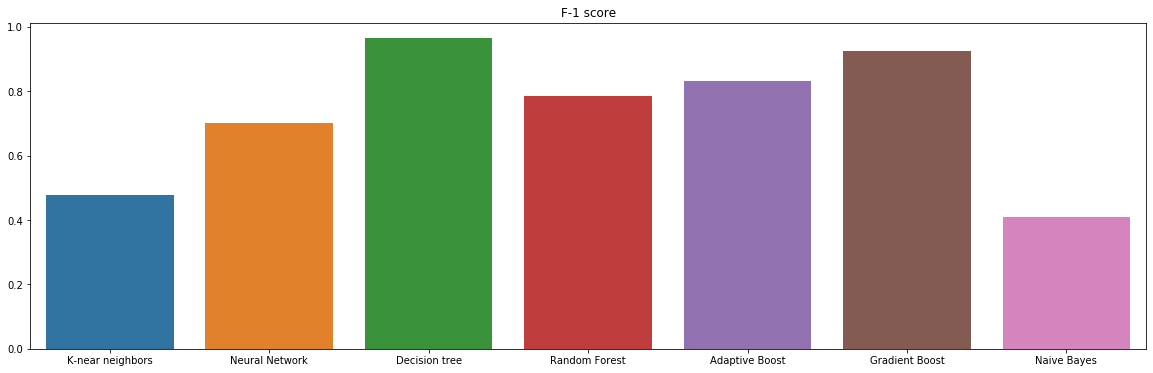

In [35]:
plt.figure(figsize=(20, 6))
plt.title("F-1 score")
sns.barplot(x=[clf[1] for clf in classifiers], y=fscores)

Итак, как видно из диаграммы наилучшие результаты показали алгоритмы из класса решающих деревьев(и надстроек над ними)
Теперь нужно выбрать один из алгоритмов и настроить в нем гиперпараметры. В первую очередь стоит это произвести над решающим деревом(мало ли удастся выжать еще больше). Так же можно попробовать будет сделать это и с градиентным бустингом.

Confusion matrix, without normalization
F1-Score 0.9841172877214416
[[29532    44]
 [  268  9666]]


(<matplotlib.axes._subplots.AxesSubplot at 0x7f4d54293358>, 0.9841172877214416)

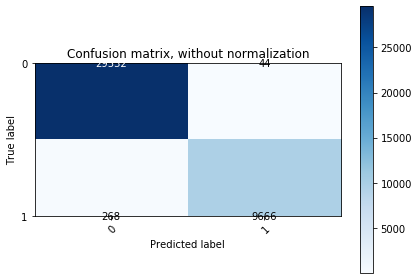

In [37]:
plot_confusion_matrix(y_train, dct_clf.predict(X_train))

In [39]:
seed = 322
# перемешаю данные еще раз
X_, X_test, y_, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=0.25, random_state=seed)

In [61]:
[x for x in range(10,41, 5)]

[10, 15, 20, 25, 30, 35, 40]

In [69]:
parameters = {
        'max_depth': range(10, 41, 10),
        'min_samples_split': range(2, 11, 4),
        'min_samples_leaf': range(1, 11, 4),
}

Confusion matrix, without normalization
F1-Score 0.988743627277775
[[3153  130]
 [  93 9794]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      3283
           1       0.99      0.99      0.99      9887

    accuracy                           0.98     13170
   macro avg       0.98      0.98      0.98     13170
weighted avg       0.98      0.98      0.98     13170



(0.988743627277775, <matplotlib.axes._subplots.AxesSubplot at 0x7f4d712312b0>)

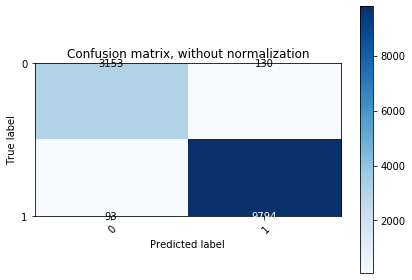

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

best_dct_clf =  GridSearchCV(DecisionTreeClassifier(), parameters, n_jobs=-1, cv=5,
                       scoring=make_scorer(f1_score))
best_dct_clf.fit(X_train, y_train)
estimate_classifier(best_dct_clf)

In [72]:
best_dct_clf.best_params_

{'max_depth': 20, 'min_samples_leaf': 7, 'min_samples_split': 2}

Проверим новые характеристики на всех датасетах.

In [77]:
classifier = DecisionTreeClassifier(max_depth=20, min_samples_leaf=7, min_samples_split=2)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Confusion matrix, without normalization
F1-Score 0.988844581293221
[[3154  129]
 [  92 9795]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      3283
           1       0.99      0.99      0.99      9887

    accuracy                           0.98     13170
   macro avg       0.98      0.98      0.98     13170
weighted avg       0.98      0.98      0.98     13170



(<matplotlib.axes._subplots.AxesSubplot at 0x7f4d53b0e7f0>, 0.988844581293221)

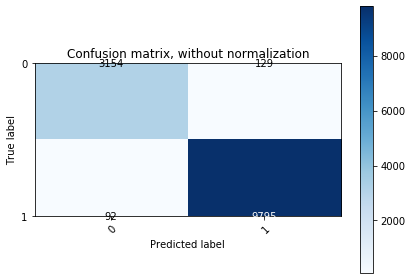

In [80]:
plot_confusion_matrix(y_val, classifier.predict(X_val))

Confusion matrix, without normalization
F1-Score 0.9885161680265941
[[3129  150]
 [  78 9813]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      3279
           1       0.98      0.99      0.99      9891

    accuracy                           0.98     13170
   macro avg       0.98      0.97      0.98     13170
weighted avg       0.98      0.98      0.98     13170



(<matplotlib.axes._subplots.AxesSubplot at 0x7f4dbe2183c8>, 0.9885161680265941)

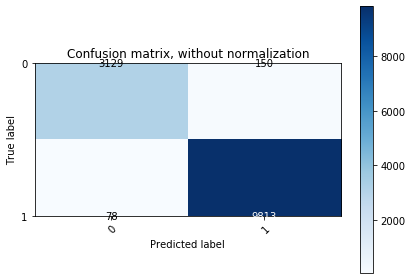

In [81]:
plot_confusion_matrix(y_test, classifier.predict(X_test))

Как видно модель успешно справилась.